# Explore here

In [452]:
# Your code here
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats

In [453]:

df = pd.read_csv('/workspaces/PAULINE---LINEAR-REGRESSION/data/raw/medical_insurance_cost.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [454]:
#Variables numéricas: age, bmi, children
#Variables categóricas: sex, smoker, region
#charges = nuestra target

In [455]:
#Queremos conocer dimensión del DF:
df.shape

(1338, 7)

In [456]:
#Tipo de data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [457]:
#Parece que no hay nulos, doblechequeamos :
df.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

No hay ningun NaN. 

In [458]:
# Revisamos que no haya fila duplicada:
sum(df.duplicated())


1

In [459]:
#Hay 1, entonces la buscamos : 
print(df[df.duplicated(keep=False)])

#La borramos : 
df.drop(df[df.duplicated() == True].index, axis=0, inplace=True)

# Revisamos que se haya eleminada::
print(sum(df.duplicated()))
print(df.shape)

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631
0
(1337, 7)


In [460]:
n_unicos = df.nunique()
n_unicos

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [461]:
#Descripción básica :
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.2,14.0,18.0,27.0,39.0,51.0,64.0
bmi,1337.0,30.7,6.1,16.0,26.3,30.4,34.7,53.1
children,1337.0,1.1,1.2,0.0,0.0,1.0,2.0,5.0
charges,1337.0,13279.1,12110.4,1121.9,4746.3,9386.2,16657.7,63770.4


Vizualisamos : Analisis univariante

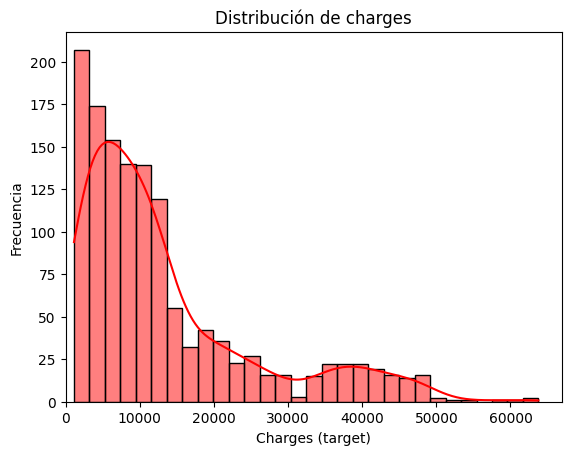

In [462]:
#Hacemos con hist de frecuencia y KDE 
#KDE = añade una lineao sobre el hist para mostrar la proba de ocurrencia de los valores en el continuo de la variable

#Primero la target, la variable dependiente : 
sns.histplot(df['charges'], kde=True, color='red', bins=30)  # Ajustamos el número de bins a 50
plt.title('Distribución de charges')
plt.xlabel('Charges (target)')
plt.ylabel('Frecuencia')
plt.xlim(left=0)
plt.show()

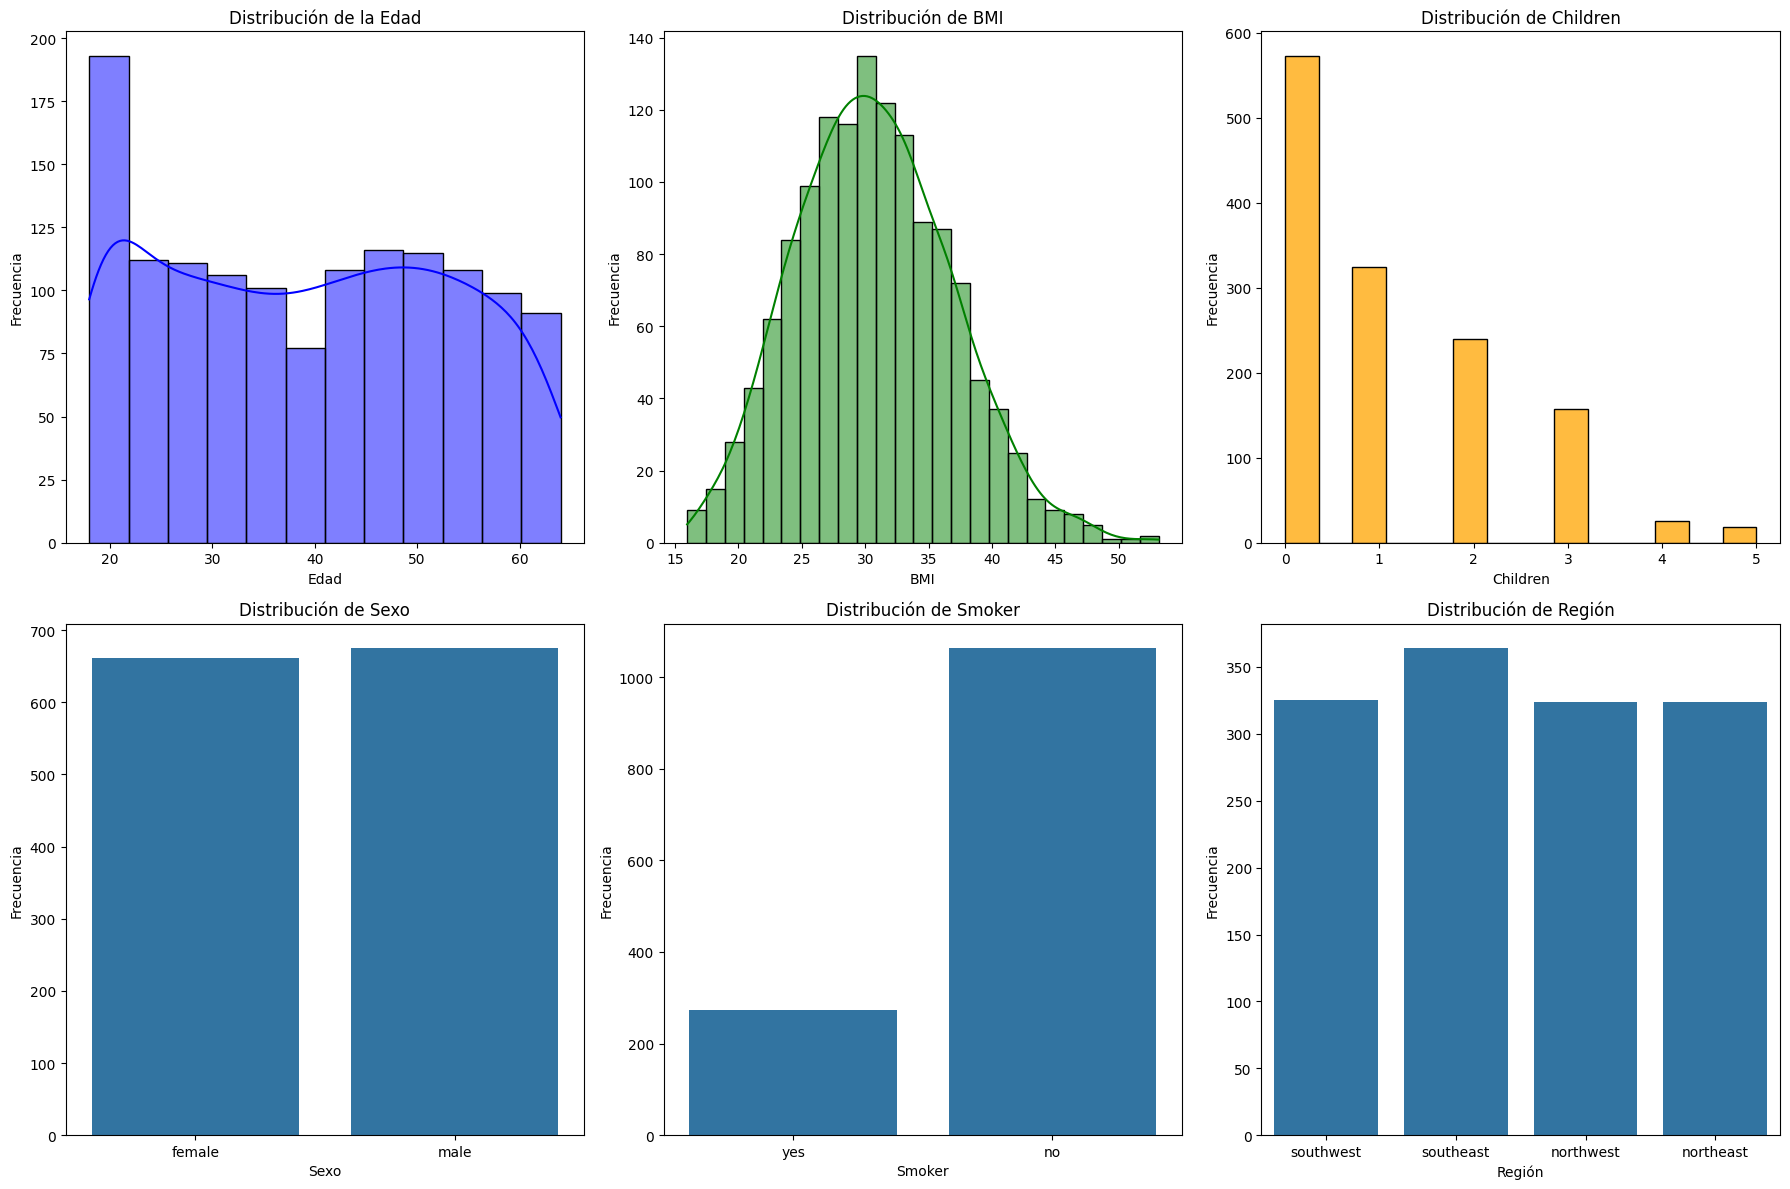

In [463]:
#Gráficos para lás 6 variables dependientes :

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

#Variables numéricas primero:

#Age
sns.histplot(df['age'], kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribución de la Edad')
axes[0, 0].set_xlabel('Edad')
axes[0, 0].set_ylabel('Frecuencia')

#BMI
sns.histplot(df['bmi'], kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribución de BMI')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frecuencia')

#Children, sin KDE, ya que es una variable discreta
sns.histplot(df['children'], kde=False, color='orange', ax=axes[0, 2])  
axes[0, 2].set_title('Distribución de Children')
axes[0, 2].set_xlabel('Children')
axes[0, 2].set_ylabel('Frecuencia')

#Categoricas :
#Sex
sns.countplot(x='sex', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Sexo')
axes[1, 0].set_xlabel('Sexo')
axes[1, 0].set_ylabel('Frecuencia')



#Smoker
sns.countplot(x='smoker', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Smoker')
axes[1, 1].set_xlabel('Smoker')
axes[1, 1].set_ylabel('Frecuencia')



#Region
sns.countplot(x='region', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Distribución de Región')
axes[1, 2].set_xlabel('Región')
axes[1, 2].set_ylabel('Frecuencia')


plt.tight_layout()
plt.show()



Vizualisamos : Analisis multivariantes, las caracteristicas vs la target

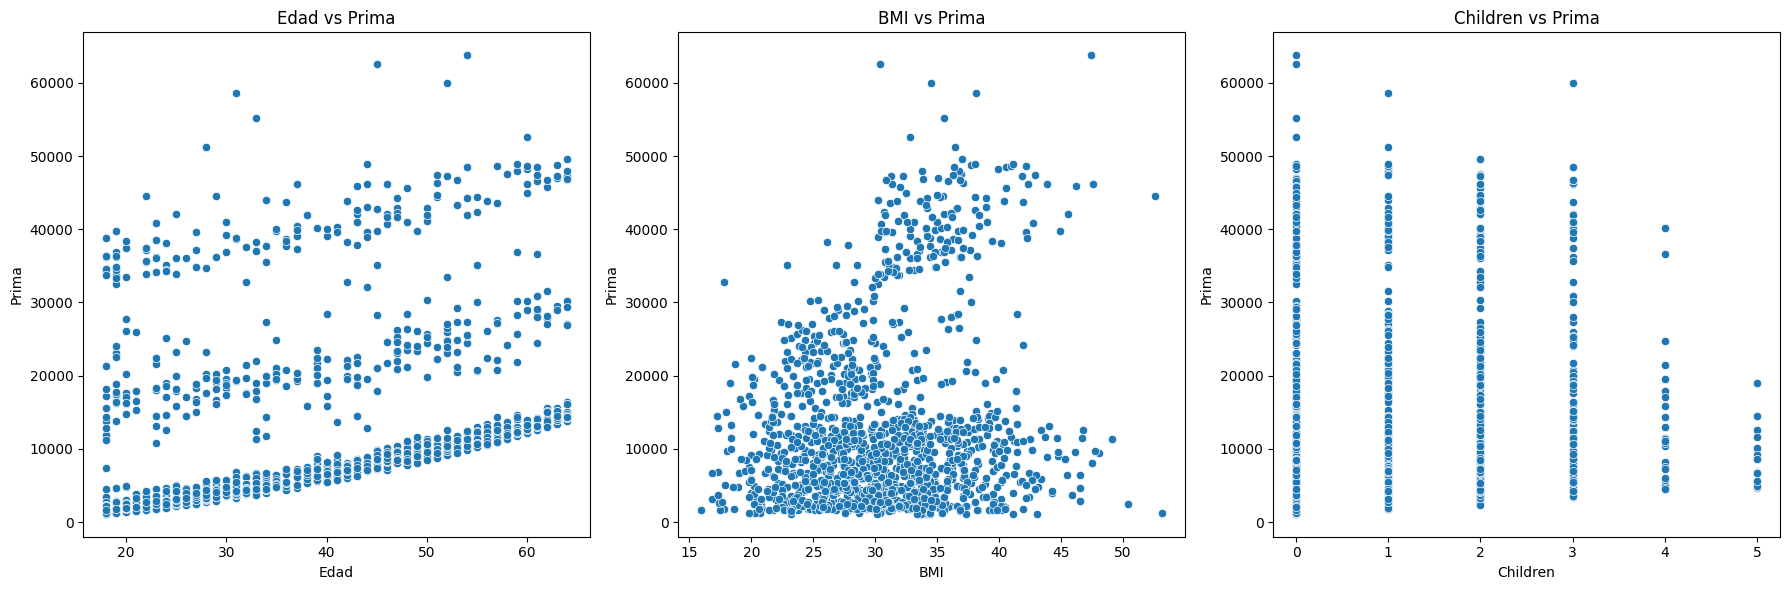

In [464]:
#Numéricas : scatter para identificar si hay un patrón

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

#age :
sns.scatterplot(x='age', y='charges', data=df, ax=axs[0])
axs[0].set_title('Edad vs Prima')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Prima')

#BMI :
sns.scatterplot(x='bmi', y='charges', data=df, ax=axs[1])
axs[1].set_title('BMI vs Prima')
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('Prima')

#Children :
sns.scatterplot(x='children', y='charges', data=df, ax=axs[2])
axs[2].set_title('Children vs Prima')
axs[2].set_xlabel('Children')
axs[2].set_ylabel('Prima')

plt.tight_layout()




Edad : se nota claramente 3 lineas de puntos, sugiere que hay una relaciín importante entre la edad y la prima. 

BMI : es una nube de puntos, no se note un patrón en particular. Surgiere que esa caracteristica no tiene mucha importancio con el precio del seguro. 

Children : Es variable discreta pues es normal que haya 6 lineas verticales, pero no podemos decir que los puntos están agrupados al lado de un valor de la prima, eso sugiere que no hay mucha relación entre los 2.

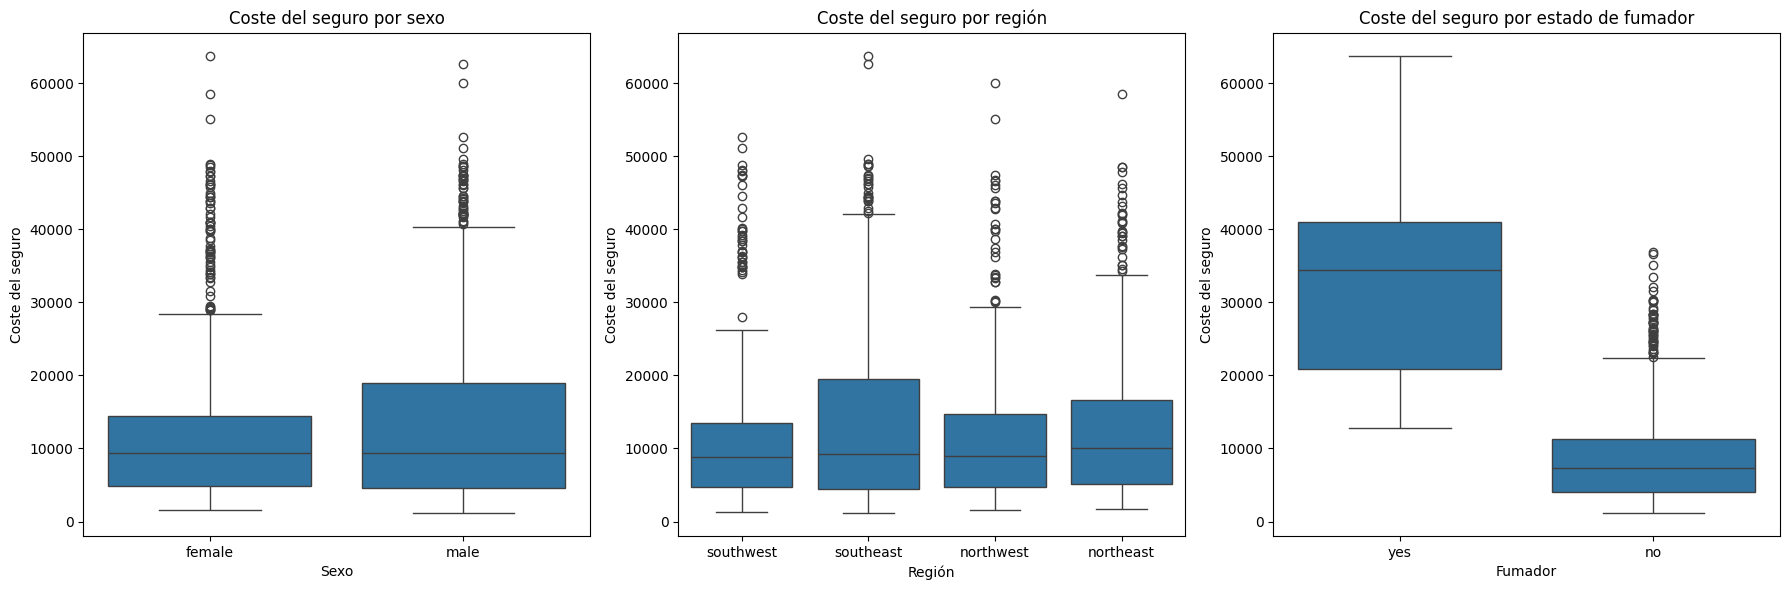

In [465]:
#Categóricas : 
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='sex', y='charges', data=df, ax=axs[0])
axs[0].set_title('Coste del seguro por sexo')
axs[0].set_xlabel('Sexo')
axs[0].set_ylabel('Coste del seguro')

# Violin plot de 'charges' por 'region'
sns.boxplot(x='region', y='charges', data=df, ax=axs[1])
axs[1].set_title('Coste del seguro por región')
axs[1].set_xlabel('Región')
axs[1].set_ylabel('Coste del seguro')

# Box plot de 'charges' por 'smoker'
sns.boxplot(x='smoker', y='charges', data=df, ax=axs[2])
axs[2].set_title('Coste del seguro por estado de fumador')
axs[2].set_xlabel('Fumador')
axs[2].set_ylabel('Coste del seguro')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Sex y region: Boxplots parecidos, mediana igual, numeros de outliers bastante similares: eso indica que esas caracteristicas no tienen mucho impacto en precio de prima 

Smoker : Los boxplot son totalmente diferentes, los precios son más elevados para los que son fumadores.

In [466]:
#Vamos a convertir las 3 columnas categoricas a num : 
col_cat = ['sex', 'smoker', 'region']
enc = LabelEncoder()

# Aplicamos label encoder a las columnas de manera independiente
df[col_cat] = df[col_cat].apply(enc.fit_transform)

print(df[col_cat].head())

   sex  smoker  region
0    0       1       3
1    1       0       2
2    1       0       2
3    1       0       1
4    1       0       1


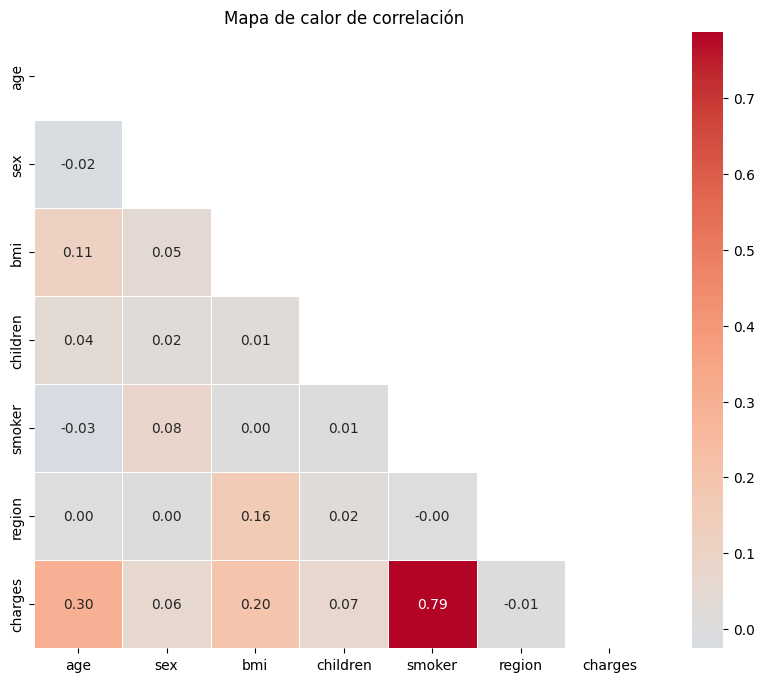

In [467]:
#Vizualisamos correlación
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask, center=0)
plt.title('Mapa de calor de correlación')
plt.show()

Nos confirma las conclusiones anteriores : Smoker tiene un impacto fuerte sobre la prima, la edad menos, pero también. 
Guardamos esas 2 variables para construir nuestro modelo de regresión lineal

In [468]:
#Filtramos esas 2 columnas y nuestra target : 
df = df[['age', 'smoker', 'charges']]
df.head() 

,age,smoker,charges
0,19,1,16884.92400
1,18,0,1725.55230
2,28,0,4449.46200
3,33,0,21984.47061
4,32,0,3866.85520


In [469]:
df.shape

(1337, 3)

In [470]:
X = df[['age','smoker']]
y = df[['charges']]

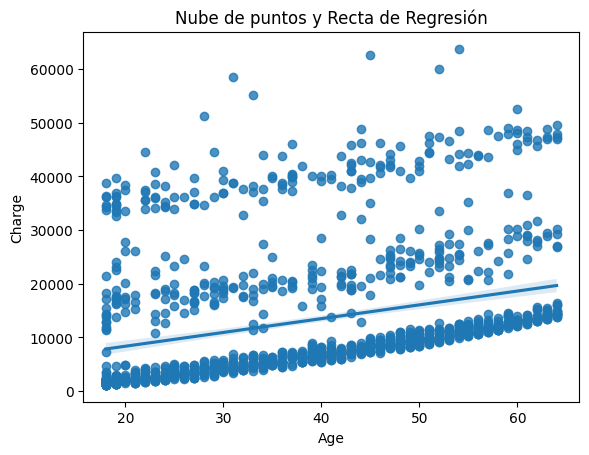

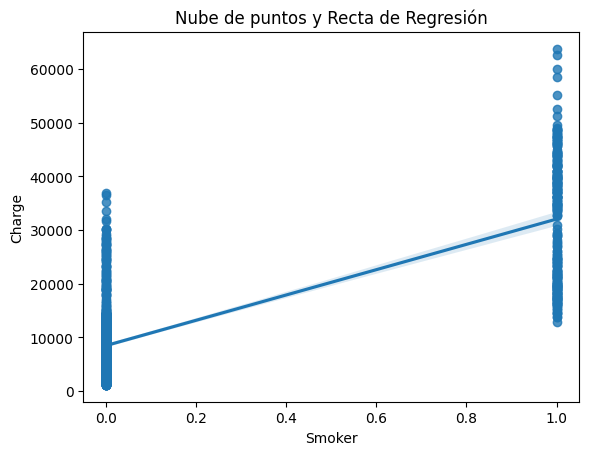

In [471]:
#Crear la nube de puntos y la recta de regresión

#Age, ya lo teniamos pero añadimos la recta :
sns.regplot(x="age", y="charges", data=df)
plt.title("Nube de puntos y Recta de Regresión")
plt.xlabel("Age")
plt.ylabel("Charge")
plt.show()

#Smoker
sns.regplot(x="smoker", y="charges", data=df)
plt.title("Nube de puntos y Recta de Regresión")
plt.xlabel("Smoker")
plt.ylabel("Charge")
plt.show()


El segundo gáfico no es muy claro ya que smoker es una caracteristica binaria entonces vamos a intentar juntar en un solo grfico 

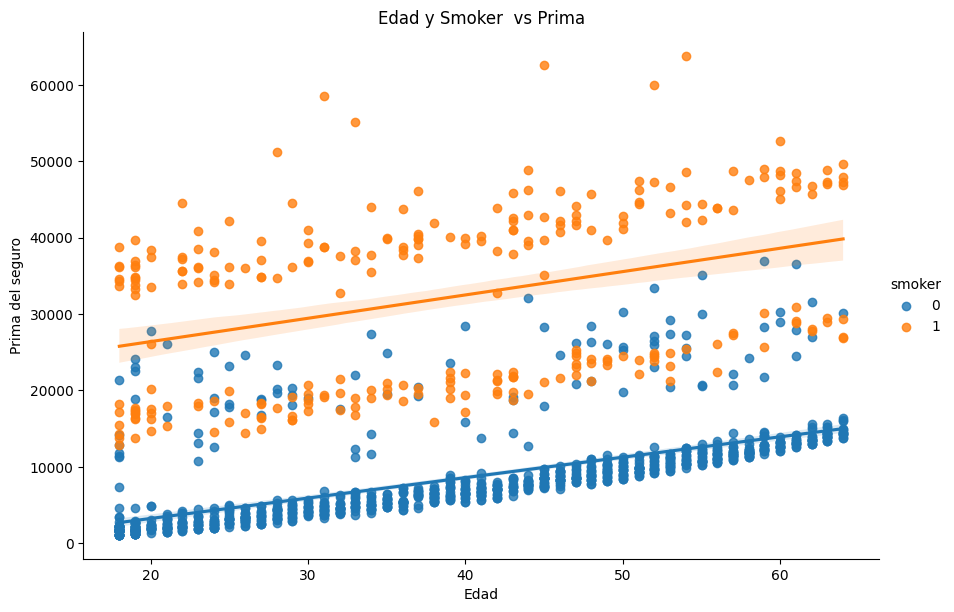

In [472]:
#Nos quedamos con nubes y recta de age, pero pondremos los fumadores en un color y los que no fuman en otra, para ver como se reparten

sns.lmplot(x="age", y="charges", data=df, hue="smoker", aspect=1.5, height=6) #hue permite asignar un colo diferente a un parametro

plt.title("Edad y Smoker  vs Prima")
plt.xlabel("Edad")
plt.ylabel("Prima del seguro")
plt.show()


Se nota claramente que los fumadores están reagrupados arriba, y alrededor de una recta. 
A Edad igual, lo que fuman pagan más caro.

Creación y entrenamiento del modelo

In [473]:
# Crear el modelo de regresión lineal
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1726.
Date:                Mon, 27 Jan 2025   Prob (F-statistic):               0.00
Time:                        20:52:29   Log-Likelihood:                -13613.
No. Observations:                1337   AIC:                         2.723e+04
Df Residuals:                    1334   BIC:                         2.725e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2386.8682    529.109     -4.511      0.0

Explicaciones :

- **Un R² de 0.721** = 72.1% de la variabilidad de las primas del seguro (charges) es explicada por el modelo, basado en las variables age y smoker. Más alto es = modelo mejor ajustado a los datos.
- **coef const** : valor cuando el X = 0 --> Aqui no tiene sentido porque no hay datos para edad 0 y smoker es categorica pues cuando es 0 es si, no es un valor matematica
- **age** : Este coeficiente indica que por cada año adicional de edad, (charges) aumentará, en promedip de 274.78 --> edad tiene un impacto positivo, más mayor es alguíen, más cara es su prima
- **smoker** : misma lógica, pero con impacto muchisimo más fuerte
- **(P>|t|) significa la p-value**: están a 0 tanto para age que para smoker pues los coeficientes son estadísticamente significativos.
-**t**: coef vs su desviación estándar. Valores más altos indican que el coeficiente es más significativo. En este caso, tanto age (22.04) como smoker (55.00) tienen valores de t muy altos, lo que refuerza la significancia estadística.
- **Intervalo de confianza**:no incluyen cero, es una señal de que el coeficiente es estadísticamente significativo

- **Durbin-Watson**: 2,080. Este valor mide la autocorrelación de los residuos. Un valor cercano a 2 indica que no hay autocorrelación. Es entonces bueno en este caso.


In [474]:
#Residuos (= valor observado - valor predicio) 
residuos = results.resid  

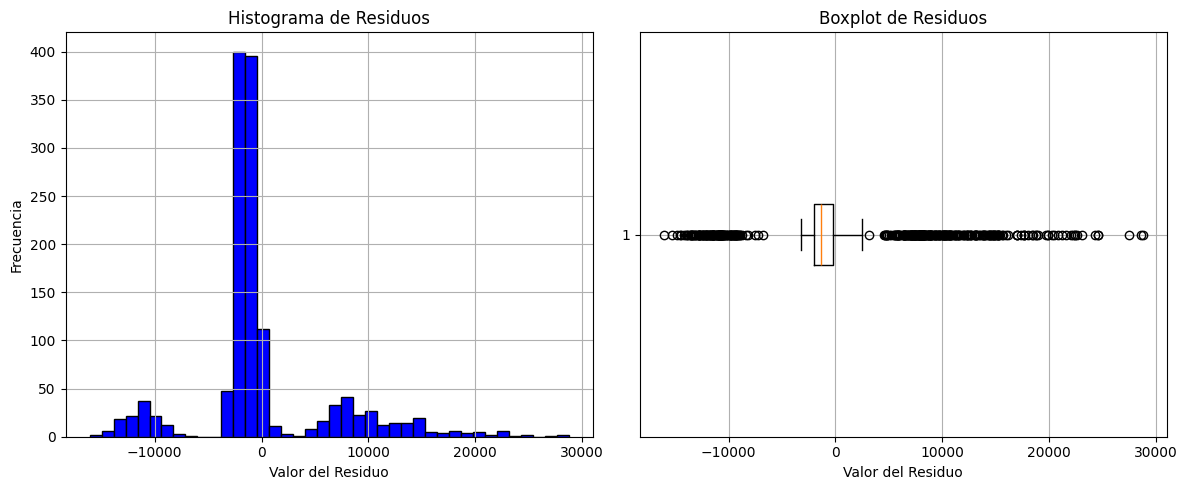

In [ ]:
#Crea una figura con dos subgráficos (uno para el histograma y otro para el boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de los residuos en el primer subgráfico (ax1)
ax1.hist(residuos, bins=40, color='blue', edgecolor='black')
ax1.set_title('Histograma de Residuos')
ax1.set_xlabel('Valor del Residuo')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)

# Boxplot de los residuos en el segundo subgráfico (ax2)
ax2.boxplot(residuos, vert=False)
ax2.set_title('Boxplot de Residuos')
ax2.set_xlabel('Valor del Residuo')
ax2.grid(True)

plt.tight_layout()  
plt.show()

No parece a una distrib normal y hay mucho outliers...

In [476]:
#Media de residuos:
np.mean(residuos)

np.float64(-8.00518597641273e-12)

Es casi igual a cero entonces está eso está ok! 

In [477]:
#prueba de normalidad de Shapiro-Wilk
stats.shapiro(residuos)

ShapiroResult(statistic=np.float64(0.8139833508067316), pvalue=np.float64(1.0470528131611854e-36))

- Estadístico de prueba (statistic): Cuanto más cercano a 1 esté, más probable es que los datos sigan una distribución normal. 0.8047 indica que hay una discrepancia considerable entre los residuos y una distribución normal.

- P-valor:  5.05e-34 es muy pequeño, mucho menor que 0.05 

--> rechazamos la hipótesis nula de que los residuos siguen una distribución normal. Esto sugiere que el modelo no está ajustando bien los datos, cierto?

In [478]:
#Solucion : intentamos ver que pasa si transformamos charges con su log y raíz cuadrada

#Añadimos 2 columas con log y raiz cuad
df['log_charges'] = np.log(df['charges'])
df['sqrt_charges'] = np.sqrt(df['charges'])

print(df.shape)

(1337, 5)


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1891.
Date:                Mon, 27 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:03:17   Log-Likelihood:                -884.61
No. Observations:                1337   AIC:                             1775.
Df Residuals:                    1334   BIC:                             1791.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3865      0.039    190.289      0.0

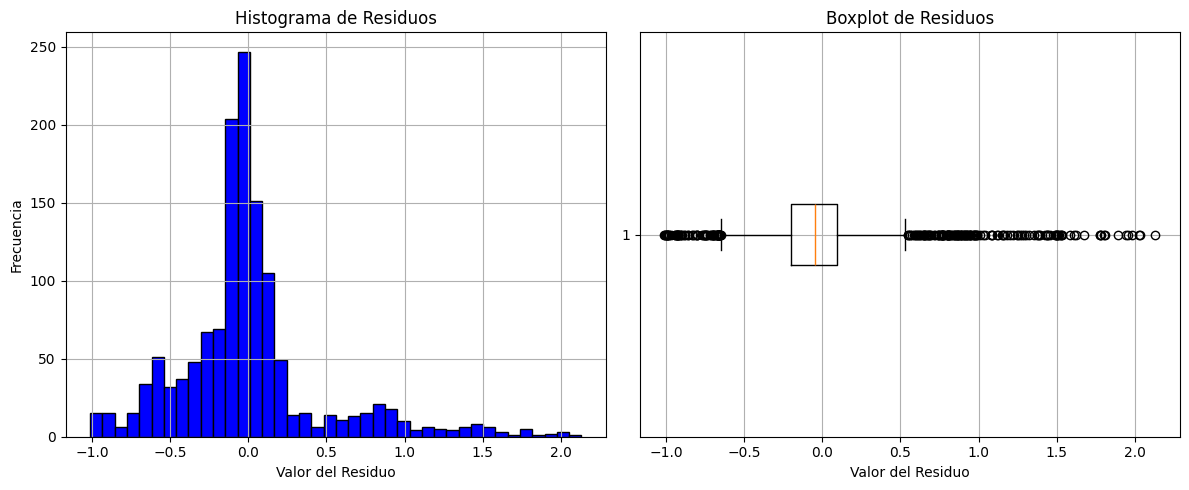

6.369375234169634e-15
ShapiroResult(statistic=np.float64(0.8751347868018857), pvalue=np.float64(2.012035083231211e-31))


In [492]:
#Modelo con la variable dependiente logarítmica
model_log = sm.OLS(np.log(y), X).fit()
print(model_log.summary())

residuos_log =model_log.resid

#Mismos graficos :
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de los residuos en el primer subgráfico (ax1)
ax1.hist(residuos_log, bins=40, color='blue', edgecolor='black')
ax1.set_title('Histograma de Residuos')
ax1.set_xlabel('Valor del Residuo')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)

# Boxplot de los residuos en el segundo subgráfico (ax2)
ax2.boxplot(residuos_log, vert=False)
ax2.set_title('Boxplot de Residuos')
ax2.set_xlabel('Valor del Residuo')
ax2.grid(True)

# Muestra la figura con ambos gráficos
plt.tight_layout()
plt.show()

#Media de residuos:
print(np.mean(residuos_log))
#prueba de normalidad de Shapiro-Wilk
print(stats.shapiro(residuos_log))



                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     2064.
Date:                Mon, 27 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:03:23   Log-Likelihood:                -6123.1
No. Observations:                1337   AIC:                         1.225e+04
Df Residuals:                    1334   BIC:                         1.227e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0351      1.953     14.869      0.0

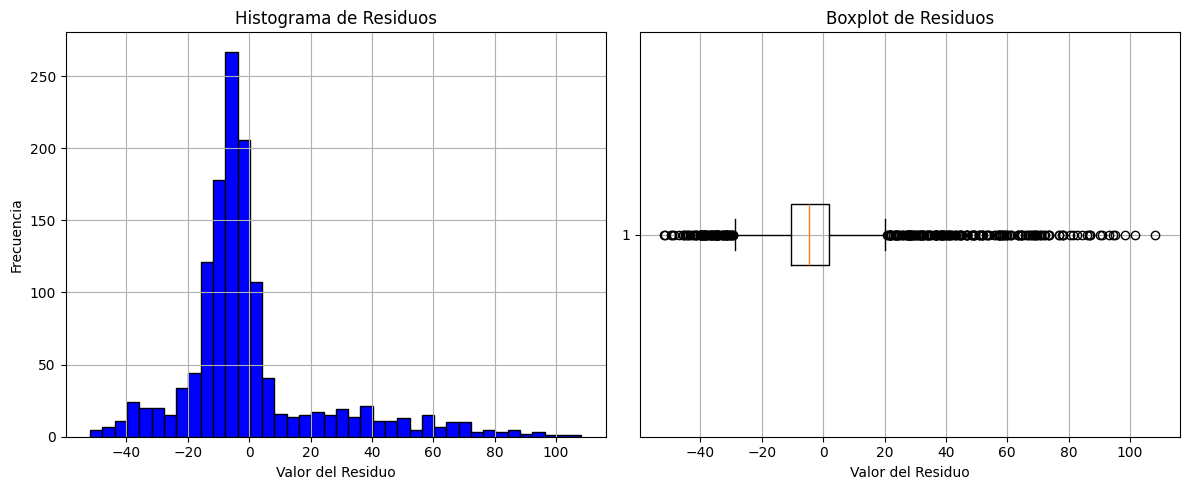

-1.0331302006863386e-14
ShapiroResult(statistic=np.float64(0.8313604825238041), pvalue=np.float64(2.2902580470900448e-35))


In [493]:
#Modelo con la variable dependiente raíz cuadrada
model_sqrt = sm.OLS(np.sqrt(y), X).fit()
print(model_sqrt.summary())

residuos_sqrt = model_sqrt.resid

#Mismos graficos :
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de los residuos en el primer subgráfico (ax1)
ax1.hist(residuos_sqrt, bins=40, color='blue', edgecolor='black')
ax1.set_title('Histograma de Residuos')
ax1.set_xlabel('Valor del Residuo')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)

# Boxplot de los residuos en el segundo subgráfico (ax2)
ax2.boxplot(residuos_sqrt, vert=False)
ax2.set_title('Boxplot de Residuos')
ax2.set_xlabel('Valor del Residuo')
ax2.grid(True)

# Muestra la figura con ambos gráficos
plt.tight_layout()
plt.show()

#Media de residuos:
print(np.mean(residuos_sqrt))
#prueba de normalidad de Shapiro-Wilk
print(stats.shapiro(residuos_sqrt))




Los 3 modelos tienen resultados similar, que haya transformación con logaritmo o con raíz cuadrada :Los residuos tienen una media muy cercana a cero, pero la prueba de Shapiro-Wilk indica que los residuos no siguen una distribución normal (p-valor muy bajo cerca).

Conclusión general: Ninguna transformación parece mejorar significativamente la normalidad de los residuos... que se podría hacer en ese caso? 

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.652
Model:                            OLS   Adj. R-squared (uncentered):              0.652
Method:                 Least Squares   F-statistic:                              2503.
Date:                Mon, 27 Jan 2025   Prob (F-statistic):                   1.68e-308
Time:                        21:17:23   Log-Likelihood:                         -14289.
No. Observations:                1337   AIC:                                  2.858e+04
Df Residuals:                    1336   BIC:                                  2.859e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

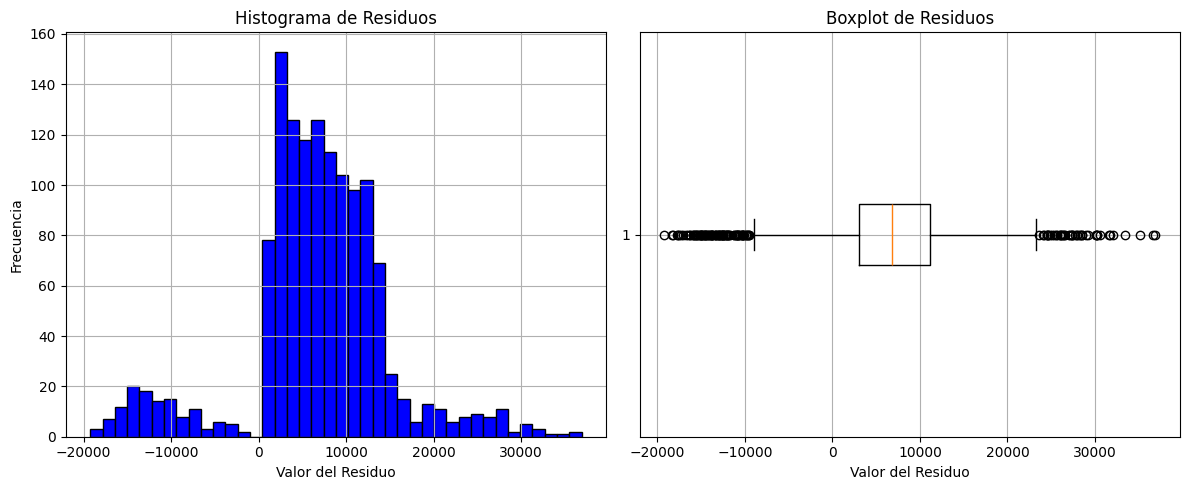

6710.861560074046
ShapiroResult(statistic=np.float64(0.9301784887096654), pvalue=np.float64(1.7311430070929162e-24))


In [496]:
#Y si quito edad? que al final solo tenia correlación 0,30, no hubiera tenido que tomarla en cuenta tal vez : 
 
X = df[['smoker']]
y = df[['charges']]

#Modelo solo con smokers
model_smokers = sm.OLS(y, X).fit()
print(model_smokers.summary())

residuos_smokers =model_smokers.resid

#Mismos graficos :
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de los residuos en el primer subgráfico (ax1)
ax1.hist(residuos_smokers, bins=40, color='blue', edgecolor='black')
ax1.set_title('Histograma de Residuos')
ax1.set_xlabel('Valor del Residuo')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)

# Boxplot de los residuos en el segundo subgráfico (ax2)
ax2.boxplot(residuos_smokers, vert=False)
ax2.set_title('Boxplot de Residuos')
ax2.set_xlabel('Valor del Residuo')
ax2.grid(True)

# Muestra la figura con ambos gráficos
plt.tight_layout()
plt.show()

#Media de residuos:
print(np.mean(residuos_smokers))
#prueba de normalidad de Shapiro-Wilk
print(stats.shapiro(residuos_smokers))


R-squared ha bajado pero sigue a más de 65%

Distribución de residuos mejoró --> valor de Shapiro-Wilk es 0.9301 con un p-valor de 1.73e-24, lo que sugiere que los residuos siguen una distribución normal con más probabilidad en comparación con los modelos anteriores.

